In [1]:
import pandas as pd
import math
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv('organics.csv', index_col=0)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22223 entries, 140 to 52856469
Data columns (total 17 columns):
GENDER          19711 non-null object
DOB             22223 non-null object
EDATE           22223 non-null object
AGE             20715 non-null float64
AGEGRP1         20715 non-null object
AGEGRP2         20715 non-null object
TV_REG          21758 non-null object
NGROUP          21549 non-null object
NEIGHBORHOOD    21549 non-null float64
LCDATE          21942 non-null object
ORGANICS        22223 non-null int64
BILL            22223 non-null float64
REGION          21758 non-null object
CLASS           22223 non-null object
ORGYN           22223 non-null int64
AFFL            21138 non-null float64
LTIME           21942 non-null float64
dtypes: float64(5), int64(2), object(10)
memory usage: 3.1+ MB


In [21]:
df.head()

,GENDER,DOB,EDATE,AGE,AGEGRP1,AGEGRP2,TV_REG,NGROUP,NEIGHBORHOOD,LCDATE,ORGANICS,BILL,REGION,CLASS,ORGYN,AFFL,LTIME
CUSTID,,,,,,,,,,,,,,,,,
140,U,1921-09-16,1998-02-23,76,3,70-80,Wales & West,C,16.0,1994-11-07,0,16000.00,Midlands,Gold,0,10.0,4.0
620,U,1949-02-12,1998-02-23,49,2,40-50,Wales & West,D,35.0,1993-06-04,0,6000.00,Midlands,Gold,0,4.0,5.0
868,F,1927-11-27,1998-02-23,70,3,70-80,Wales & West,D,27.0,1990-08-02,1,0.02,Midlands,Silver,1,5.0,8.0
1120,M,1932-04-10,1998-02-23,65,3,60-70,Midlands,F,51.0,1991-07-01,1,0.01,Midlands,Tin,1,10.0,7.0
2313,F,1929-05-21,1998-02-23,68,3,60-70,Midlands,A,4.0,1990-03-01,0,0.01,Midlands,Tin,0,11.0,8.0


In [13]:
df['AGE']=(pd.to_datetime(df['EDATE'])-pd.to_datetime(df['DOB'])).dt.days.apply(lambda x:math.floor(x/365))

In [17]:
def split_Age(x):
    if x>=0 and x<=20:
        return 0
    elif x<=40:
        return 1
    elif x<=60:
        return 2
    elif x<=80:
        return 3
    elif x<=100:
        return 4
        

In [18]:
df['AGEGRP1']=df.AGE.apply(split_Age)

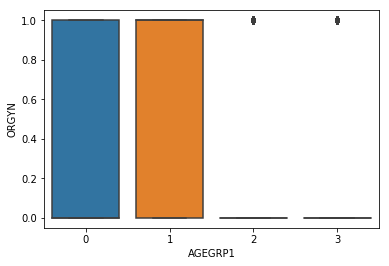

In [22]:
g = sb.boxplot(x='AGEGRP1',y='ORGYN',data=df)
plt.show()

In [33]:
df['AGEGRP1'].fillna(df['AGEGRP1'].mode()[0], inplace=True)

In [38]:
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)

In [ ]:
df['GENDER'].fillna(df['GENDER'].mean()[0], inplace=True)

In [39]:
df.drop(['DOB','EDATE','AGEGRP2','TV_REG','NEIGHBORHOOD','LCDATE','ORGANICS'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22223 entries, 140 to 52856469
Data columns (total 10 columns):
GENDER     22223 non-null object
AGE        20715 non-null float64
AGEGRP1    22223 non-null object
NGROUP     21549 non-null object
BILL       22223 non-null float64
REGION     21758 non-null object
CLASS      22223 non-null object
ORGYN      22223 non-null int64
AFFL       21138 non-null float64
LTIME      21942 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 2.5+ MB


In [14]:
df['Car'].fillna(df['Car'].mean(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22223 entries, 140 to 52856469
Data columns (total 10 columns):
GENDER     19711 non-null object
AGE        20715 non-null float64
AGEGRP1    20715 non-null object
NGROUP     21549 non-null object
BILL       22223 non-null float64
REGION     21758 non-null object
CLASS      22223 non-null object
ORGYN      22223 non-null int64
AFFL       21138 non-null float64
LTIME      21942 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 2.5+ MB


In [9]:
df=pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22223 entries, 140 to 52856469
Data columns (total 30 columns):
BILL                 22223 non-null float64
ORGYN                22223 non-null int64
AFFL                 21138 non-null float64
LTIME                21942 non-null float64
GENDER_F             22223 non-null uint8
GENDER_M             22223 non-null uint8
GENDER_U             22223 non-null uint8
AGEGRP2_10-20        22223 non-null uint8
AGEGRP2_20-30        22223 non-null uint8
AGEGRP2_30-40        22223 non-null uint8
AGEGRP2_40-50        22223 non-null uint8
AGEGRP2_50-60        22223 non-null uint8
AGEGRP2_60-70        22223 non-null uint8
AGEGRP2_70-80        22223 non-null uint8
NGROUP_A             22223 non-null uint8
NGROUP_B             22223 non-null uint8
NGROUP_C             22223 non-null uint8
NGROUP_D             22223 non-null uint8
NGROUP_E             22223 non-null uint8
NGROUP_F             22223 non-null uint8
NGROUP_U             22223 non-null uint

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# split into training and test
rs = 0
X = df.drop(['ORGYN'], axis=1)
y = df['ORGYN']

X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # don't fit this
# first logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train) # fit

print("Training accuracy:", logreg.score(X_train, y_train))
print("Test accuracy:", logreg.score(X_test, y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22223 entries, 140 to 52856469
Data columns (total 29 columns):
BILL                 22223 non-null float64
AFFL                 21138 non-null float64
LTIME                21942 non-null float64
GENDER_F             22223 non-null uint8
GENDER_M             22223 non-null uint8
GENDER_U             22223 non-null uint8
AGEGRP2_10-20        22223 non-null uint8
AGEGRP2_20-30        22223 non-null uint8
AGEGRP2_30-40        22223 non-null uint8
AGEGRP2_40-50        22223 non-null uint8
AGEGRP2_50-60        22223 non-null uint8
AGEGRP2_60-70        22223 non-null uint8
AGEGRP2_70-80        22223 non-null uint8
NGROUP_A             22223 non-null uint8
NGROUP_B             22223 non-null uint8
NGROUP_C             22223 non-null uint8
NGROUP_D             22223 non-null uint8
NGROUP_E             22223 non-null uint8
NGROUP_F             22223 non-null uint8
NGROUP_U             22223 non-null uint8
REGION_Midlands      22223 non-null uint